# **Digit Recognizer ->**

**Load Data & Recquired Libraries:**

In [1]:
#Connecting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Unzipping data files
!unzip '/content/drive/MyDrive/digit-recognizer.zip'

Archive:  /content/drive/MyDrive/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 24 kB/s 
     |████████████████████████████████| 1.3 MB 7.5 MB/s 
     |████████████████████████████████| 463 kB 67.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1
    Uninstalling tensorflow-2.9.1:
      Successfully uninstalled tensorflow-2.9.1


In [4]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

In [5]:
#Reading .csv files.
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

## **Exploratory Data Analysis :**

In [6]:
#Taking a look at the train data.
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Shapes of train and test data set.
print(train_df.shape)
print(test_df.shape)

(42000, 785)
(28000, 784)


In [8]:
#There are no null values in data.
print('The number of missing values in training data is :', train_df.isnull().sum().sum())
print('The number of missing values in test data is :', test_df.isnull().sum().sum())

The number of missing values in training data is : 0
The number of missing values in test data is : 0


In [9]:
#Separating data into X & Y.
X = train_df.drop("label", axis=1)
Y = train_df["label"]

In [10]:
#Counts of images for 0 to 9 digits.
Y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

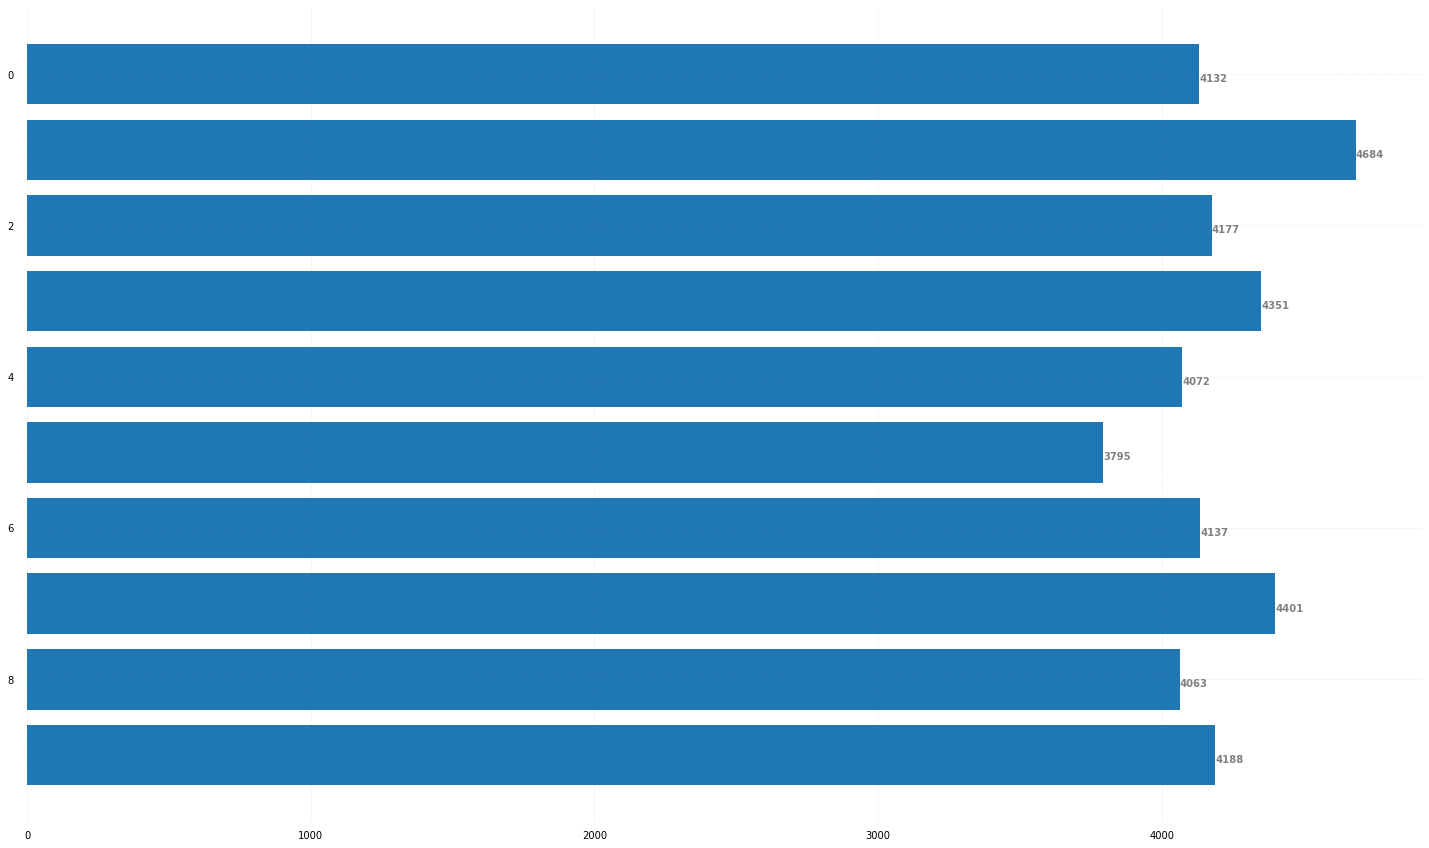

In [11]:
#Plot for the frequency of handwritten digit images from 0 ot 9 in our data set.
digits = [0,1,2,3,4,5,6,7,8,9]
counts = []
for i in range(0,10):
  count=Y.value_counts()[i]
  counts.append(count)
# Figure Size
fig, ax = plt.subplots(figsize =(25, 15))
# Horizontal Bar Plot
ax.barh(digits, counts)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Show Plot
plt.show()


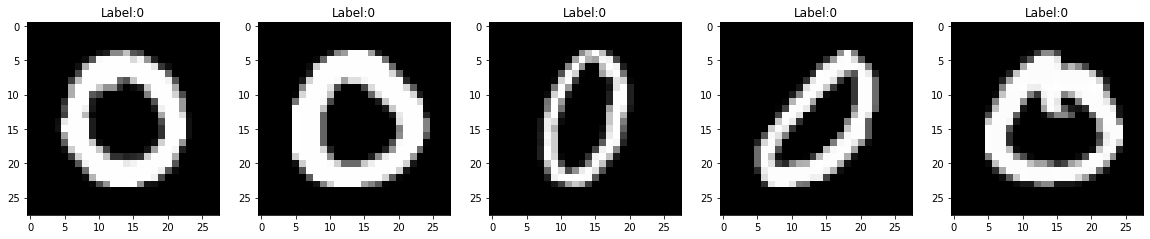

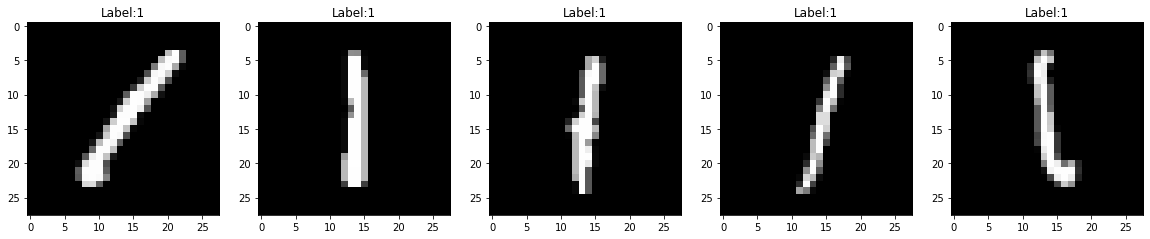

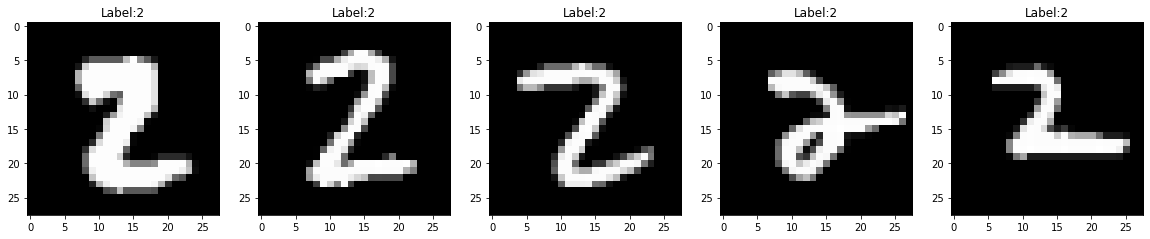

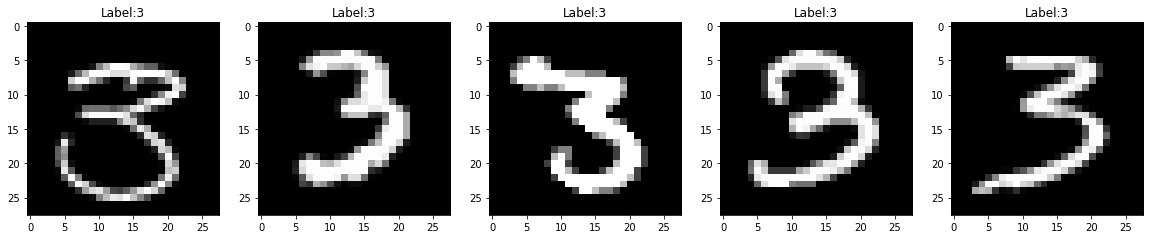

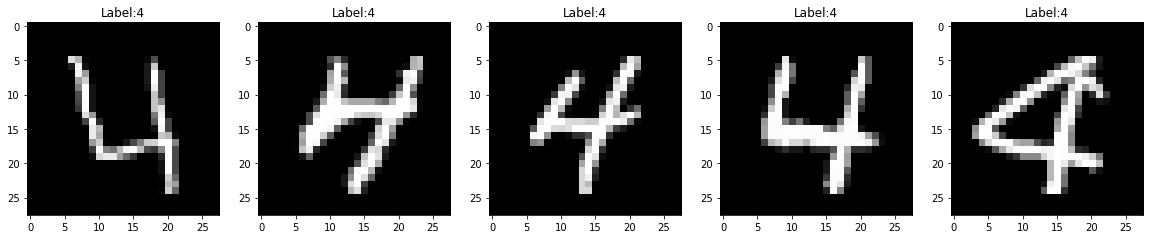

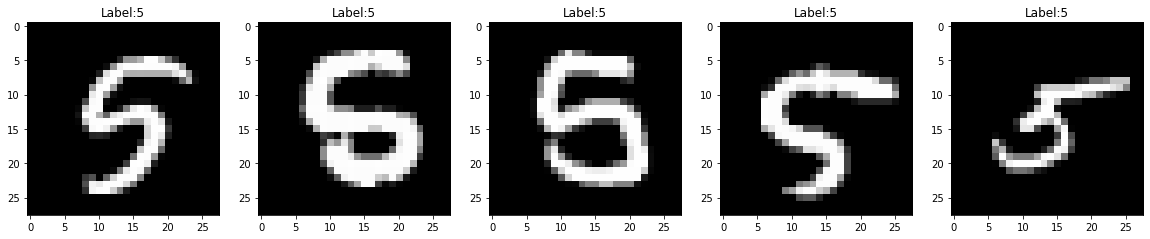

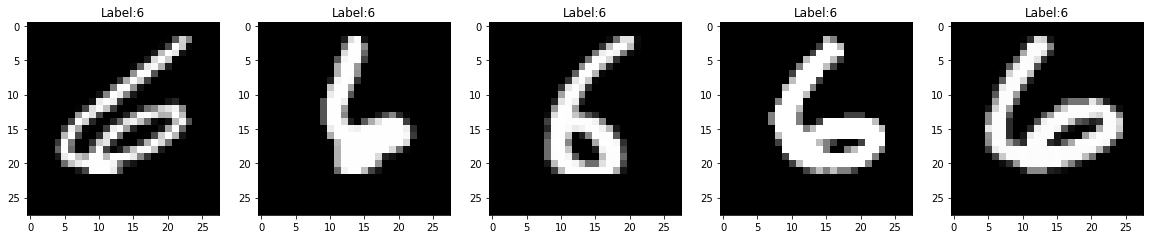

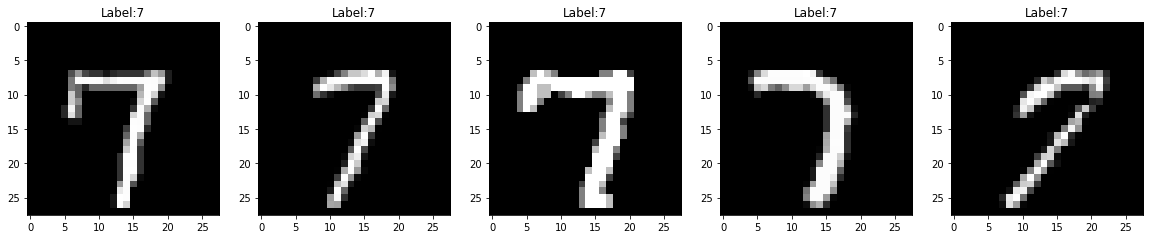

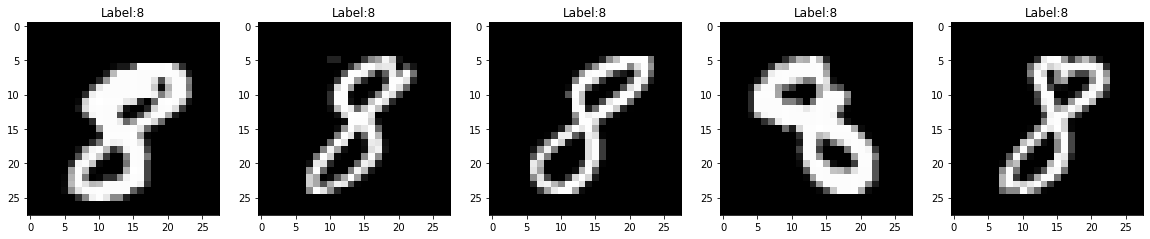

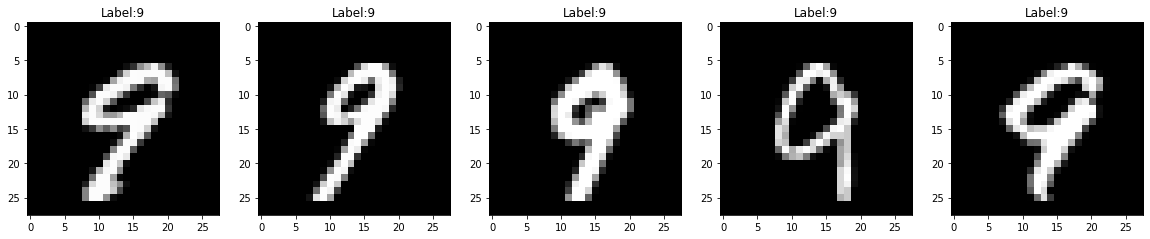

In [12]:
#Ploting 5 handwritten digit images atleast for each digit(0 to 9). 
#All the images have same height & width of 28x28 pixels.
train=X.to_numpy()
image = train.reshape(train.shape[0], 28, 28)
for every in range(0,10):
  plt.figure(figsize=(20,8))
  digit_0=Y[Y==every].index[0:5]
  for i in range(0,5):
    each=digit_0[i]
    plt.subplot(1, 5, (i+1))
    plt.imshow(image[each], cmap="gray")
    plt.title('Label:'+str(Y[each]))

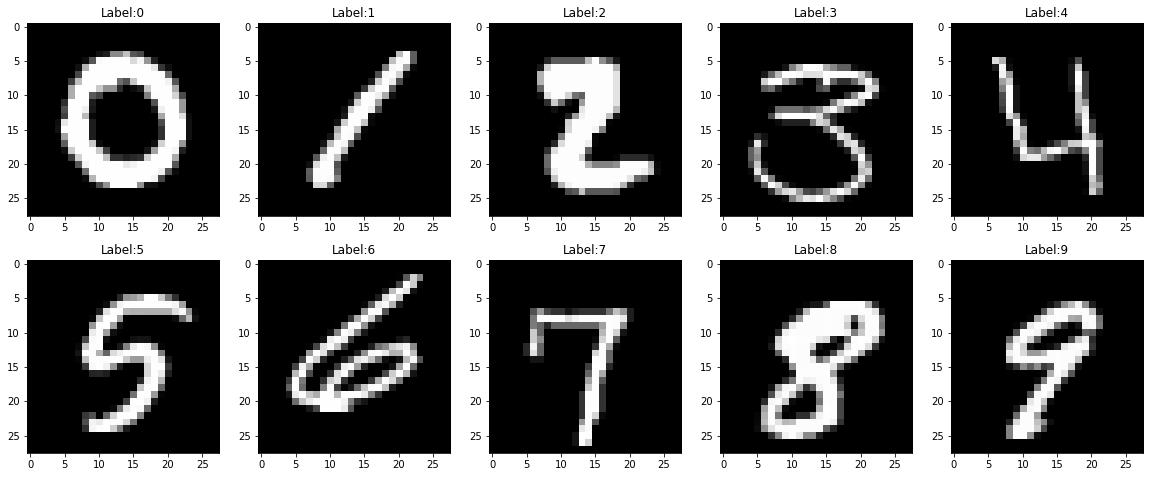

In [13]:
#Below are the plots of handwritten images for each digit(0 to 9). 
image = train.reshape(train.shape[0], 28, 28)
plt.figure(figsize=(20,8))
for i in range(0,10):
  label=Y[Y==i][0:1].index
  l=int(label[0])
  plt.subplot(2, 5, (i+1))
  plt.imshow(image[l], cmap="gray")
  plt.title('Label:'+str(Y[l]))

## Dimensionality Reduction :

In [14]:
#Reducing the 784 dim into 2 dim inorder to get a 2D Plot.
pca = PCA(n_components=2, random_state = 1)
df_pca = pca.fit_transform(train)

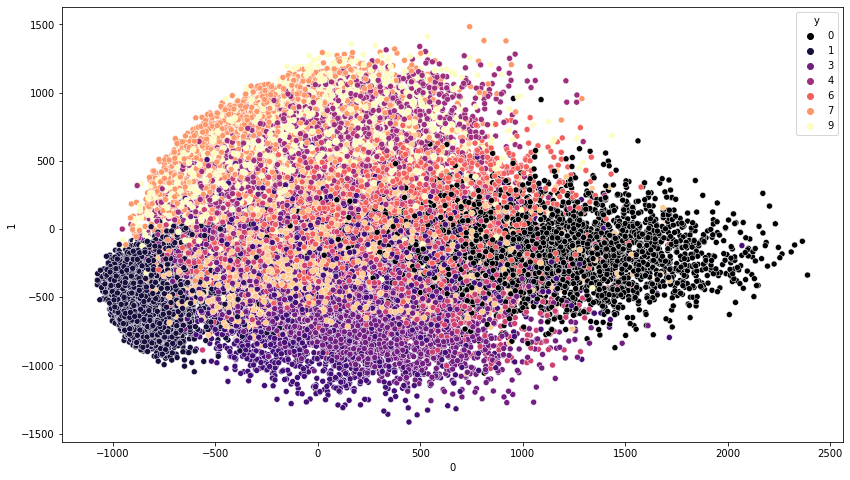

In [15]:
#Below is the 2D Plot of the data using PCA.
df_vis = pd.DataFrame(df_pca)
df_vis['y'] = Y.values

plt.figure(figsize = (14, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

## t-distributed Stochastic Neighbor Embedding :

In [16]:
#Apllying t-sne on data
tsne = TSNE(
    n_components=2, 
    random_state = 1,
    n_iter = 1000,
    n_jobs = -1
)
df_tsne = tsne.fit_transform(train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


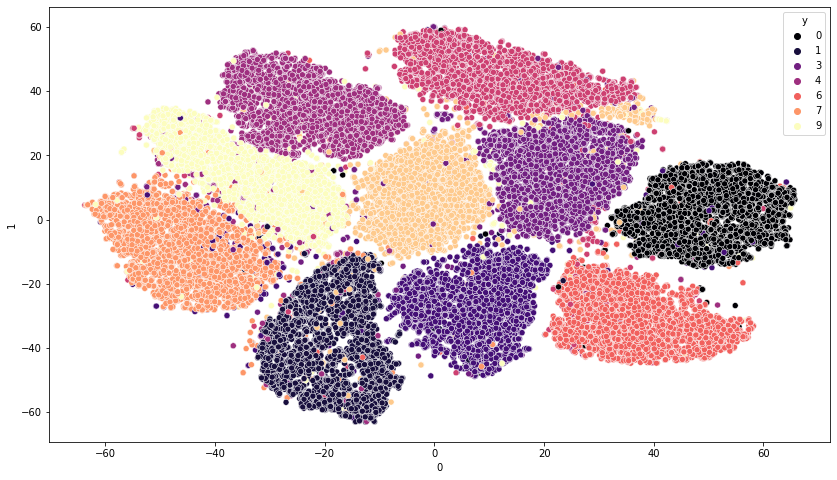

In [17]:
#Below is the t-sne plot for the data.
#We can see that the 2D visualization using t-sne method is better than PCA as the data points are seperable in some amount.
df_vis = pd.DataFrame(df_tsne)
df_vis['y'] = Y.values

plt.figure(figsize = (14, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

##**Splitting Dataset into Train & Test :**

In [18]:
#Splitting Data set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, stratify=Y)
#train & test data shapes
print('train ->')
print('x shape:', X_train.shape)
print('y shape:', y_train.shape)
print('*'*50)
print('test ->')
print('x shape:', X_test.shape)
print('y shape:', y_test.shape)

train ->
x shape: (37800, 784)
y shape: (37800,)
**************************************************
test ->
x shape: (4200, 784)
y shape: (4200,)


In [19]:
# Function for plotting Confusion Matrix
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
 C = confusion_matrix(test_y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,10))

 labels = [1,2]
 # representing A in heatmap format
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")

 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")

 plt.subplot(1, 3, 3)
 # representing B in heatmap format
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")

 plt.show()

## **Modelling :**

### **Random Model :**

Total number of data points : 4200


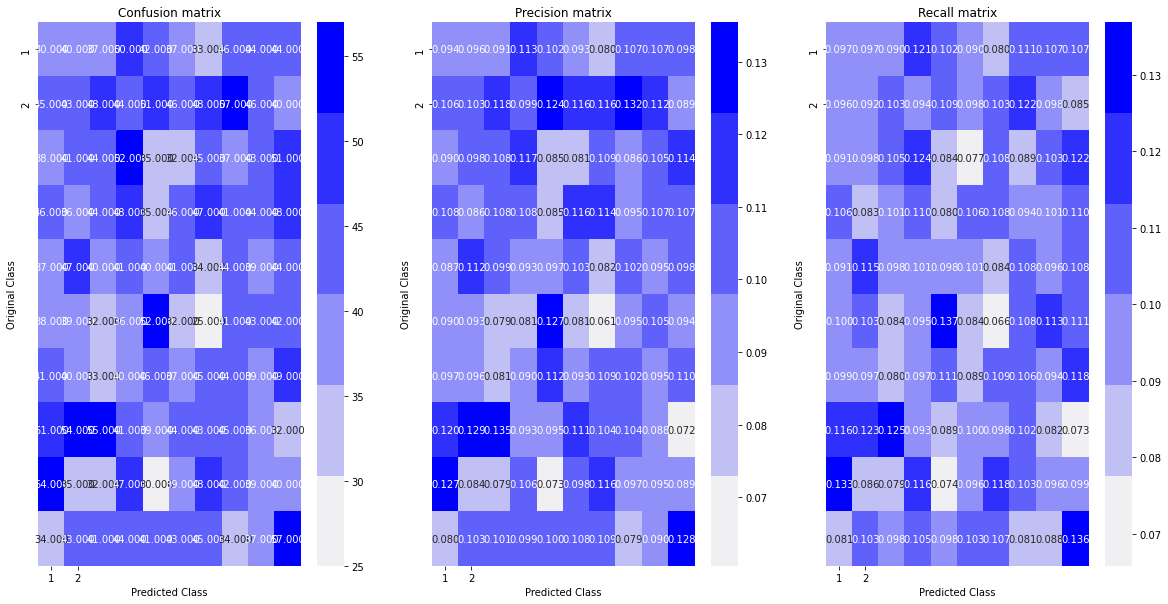

Accuracy on Test Data using Random Model 0.1030952380952381


In [20]:
#Random Model:
predicted_y = np.random.randint(0, 10, size=X_test.shape[0])

print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print("Accuracy on Test Data using Random Model",accuracy_score(y_test, predicted_y))

###**CNN Model :**

In [21]:
xtrain = X_train.values
ytrain = y_train.values

xtest = X_test.values
ytest = y_test.values

In [22]:
#Normalization of data
#from 0-255 to 0-1 
xtrain = xtrain / 255
xtest = xtest / 255

In [23]:
# Reshape image in 3D
xtrain = xtrain.reshape(-1,28,28,1)
ytrain = to_categorical(ytrain)

xtest = xtest.reshape(-1,28,28,1)
ytest = to_categorical(ytest)

In [24]:
# Data Augmentation
# To provide more data during the training process, we can make use of existing dataset. 
# The idea is to alter the training data with small transformations (horizontal flips, vertical flips, random crops, rotations etc.) 

Data_Gen = ImageDataGenerator(rotation_range=10, zoom_range = 0.025, width_shift_range=0.05, height_shift_range=0.05, horizontal_flip=False, vertical_flip=False)
Data_Gen.fit(xtrain)
train = Data_Gen.flow(xtrain, ytrain, batch_size=128)
test = Data_Gen.flow(xtest, ytest, batch_size=128)

In [25]:
#Reduce learning rate when a metric has stopped improving.
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, mode='max',verbose=1)

#Stop training when a monitored metric has stopped improving.
checkpoint = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

In [26]:
# CNN Model
model=Sequential()
   
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))    
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [28]:
# Training the Model
batch_size = 128
train_steps = xtrain.shape[0] // batch_size
valid_steps = xtest.shape[0] // batch_size

model.fit(train, epochs=100, steps_per_epoch = train_steps, validation_data = test, validation_steps = valid_steps, callbacks=[reduce_lr, checkpoint])

Epoch 1/100
295/295 [==============================] - 24s 42ms/step - loss: 0.1410 - accuracy: 0.9580 - val_loss: 1.4388 - val_accuracy: 0.5190 - lr: 0.0010
Epoch 2/100
295/295 [==============================] - 12s 40ms/step - loss: 0.0476 - accuracy: 0.9847 - val_loss: 0.0572 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 3/100
295/295 [==============================] - 12s 41ms/step - loss: 0.0364 - accuracy: 0.9889 - val_loss: 0.0461 - val_accuracy: 0.9841 - lr: 0.0010
Epoch 4/100
295/295 [==============================] - 12s 41ms/step - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0502 - val_accuracy: 0.9863 - lr: 0.0010
Epoch 5/100
295/295 [==============================] - 12s 41ms/step - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.0457 - val_accuracy: 0.9866 - lr: 0.0010
Epoch 6/100
295/295 [==============================] - 12s 40ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0353 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 7/100
295/295 [==============================]

Total number of data points : 4200


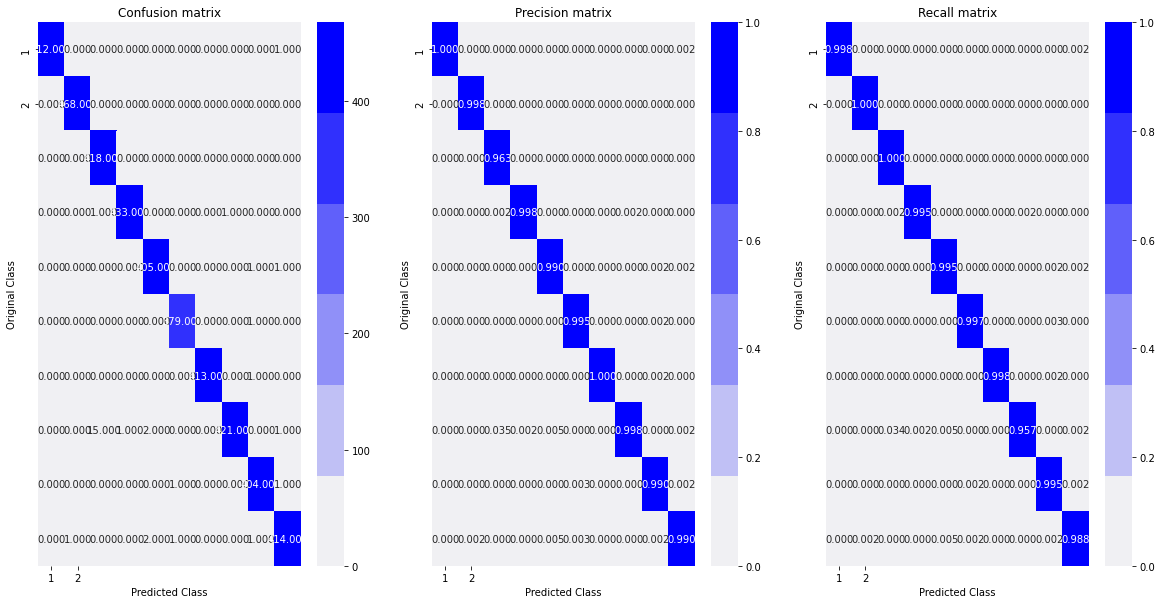

Accuracy on Test Data using CNN Model 0.9921428571428571


In [29]:
# Prediction on test data using trained model
y_pred=model.predict(xtest)
y_predicted = np.argmax(y_pred, 1)

#Plotting Confusion Matrix & Accuracy
print("Total number of data points :", len(y_predicted))
plot_confusion_matrix(y_test, y_predicted)
print("Accuracy on Test Data using CNN Model",accuracy_score(y_test, y_predicted))

### ***Submission for Kaggle Competition :***

In [30]:
#Preprocessing the test data set.
test = test_df.values
test = test / 255.0
test = test.reshape(-1,28,28,1)

In [31]:
#Predicting over test data set.
output=model.predict(test)

In [32]:
#Taking Argument max value from the output to get the predicted values.
output.shape
pred = np.argmax(output, 1)
pred.shape

(28000,)

In [33]:
#Converting the predicted values to recquired dataframe.
data = pd.DataFrame(pred, columns = ['Label'])

id = list(range(1,28001))
id = pd.DataFrame(id, columns = ['ImageId'])
submission=pd.concat([id, data], axis=1)

In [34]:
#Saving submission dataframe to csv file.
submission.to_csv('submission.csv', index=False)

### ***--> Obtained Leaderboard Score of 0.99160***

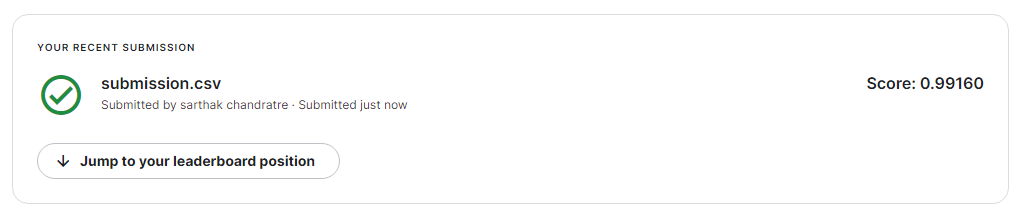

In [35]:
#Saving trained Model.

import pickle
pickle.dump(model, open("model.pkl", "wb"))

## **Post Training Analysis :**

**WORST MODEL**

In [36]:
# CNN Model_1
model_1=Sequential()
   
model_1.add(Conv2D(filters=8, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model_1.add(Conv2D(filters=8, kernel_size = (3,3), activation="relu"))

model_1.add(Flatten())
model_1.add(Dense(8,activation="relu"))
    
model_1.add(Dense(10,activation="softmax"))    
model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 8)         584       
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 8)                 36872     
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 37,626
Trainable params: 37,626
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_1.fit(xtrain, ytrain, batch_size=128, validation_split=0.2, epochs=3)

Epoch 1/3
237/237 [==============================] - 2s 5ms/step - loss: 0.7699 - accuracy: 0.7609 - val_loss: 0.3477 - val_accuracy: 0.9044
Epoch 2/3
237/237 [==============================] - 1s 4ms/step - loss: 0.2728 - accuracy: 0.9187 - val_loss: 0.1952 - val_accuracy: 0.9481
Epoch 3/3
237/237 [==============================] - 1s 4ms/step - loss: 0.1672 - accuracy: 0.9515 - val_loss: 0.1467 - val_accuracy: 0.9622


Total number of data points : 4200
Accuracy on Test Data using CNN Model 0.9561904761904761


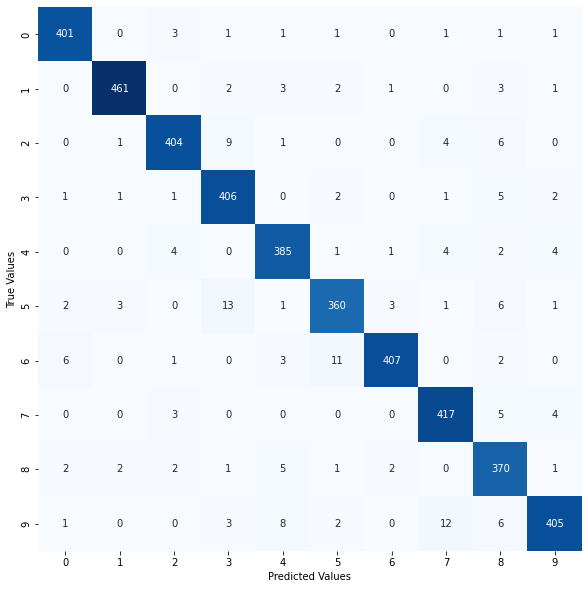

In [38]:
# Prediction on test data using trained model
y_pred=model_1.predict(xtest)
y_predicted = np.argmax(y_pred, 1)

#Plotting Confusion Matrix & Accuracy
print("Total number of data points :", len(y_predicted))
print("Accuracy on Test Data using CNN Model",accuracy_score(y_test, y_predicted)) # Accuracy

fig = plt.figure(figsize=(10, 10))
mat = confusion_matrix(y_test, y_predicted) # Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [39]:
def False_Predicted(xtest, y_test, y_predicted):
  test=pd.DataFrame(y_test)

  actual=[]
  predicted=[]
  location=[]
  for i in range(0,len(y_predicted)):
    test_value=test['label'].iloc[i]
    pred_value=y_predicted[i]
    image = xtest.reshape(xtest.shape[0], 28, 28)
    if test_value!=pred_value:
      actual.append(test_value)
      predicted.append(pred_value)
      location.append(i)
  return actual, predicted, location

Number of Missclassified points : 184


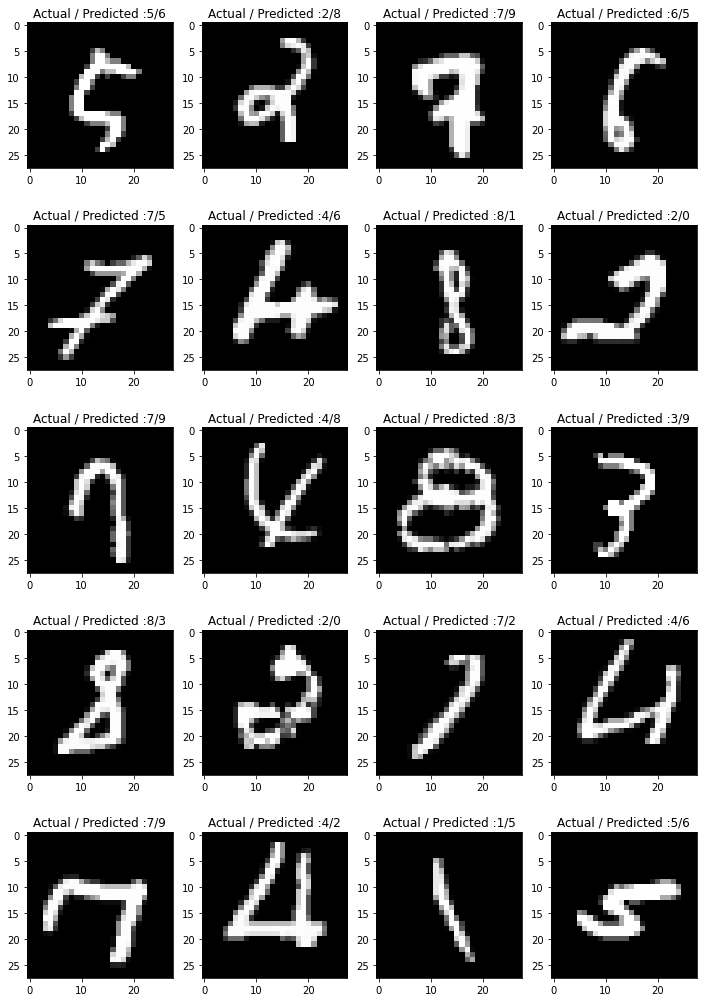

In [40]:
actual, predicted, location = False_Predicted(xtest, y_test, y_predicted)

print("Number of Missclassified points :", len(location))
image = xtest.reshape(xtest.shape[0], 28, 28)
plt.figure(figsize=(12,18))
for i in range(0,20):
  act=actual[i]
  pred=predicted[i]
  loc=location[i]
  plt.subplot(5, 4, (i+1))
  plt.imshow(image[loc], cmap="gray")
  plt.title('Actual / Predicted :'+str(act)+'/'+str(pred))

**Observation :**  
1. Here we are using a shallow model (model_1) for worst performance on data, so that we can analyze where our model makes mistakes most.
2. It is clear that our model missclassifies the digits which are somewhat similar in looking, for eg. 7 & 2, 3 & 8, 6 & 5, 7 & 9 etc.
3. From confusion matrix we see that the model makes mistakes most for the digits 3 & 5(true value:3 & predicted:5), 5 & 6, 7 & 9.
4. These error can minimized by using data augmentation, in this method images zoom, rotated & flipped in order to increase the number of training data in order for the better understanding of model, so that it can performed good on unseen data. 

**MEDIUM MODEL**

In [41]:
# CNN Model_2
model_2=Sequential()

model_2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))    

model_2.add(Flatten())
model_2.add(Dense(8,activation="relu"))
    
model_2.add(Dense(10,activation="softmax"))    
model_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0         
                                                                 
 dense_4 (Dense)             (None, 8)                

In [42]:
model_2.fit(xtrain, ytrain, batch_size=8, validation_split=0.2, epochs=3)

Epoch 1/3
3780/3780 [==============================] - 16s 4ms/step - loss: 0.5464 - accuracy: 0.8346 - val_loss: 0.2973 - val_accuracy: 0.9243
Epoch 2/3
3780/3780 [==============================] - 14s 4ms/step - loss: 0.2227 - accuracy: 0.9404 - val_loss: 0.1499 - val_accuracy: 0.9594
Epoch 3/3
3780/3780 [==============================] - 14s 4ms/step - loss: 0.1247 - accuracy: 0.9662 - val_loss: 0.1242 - val_accuracy: 0.9708


Total number of data points : 4200
Accuracy on Test Data using CNN Model 0.9680952380952381


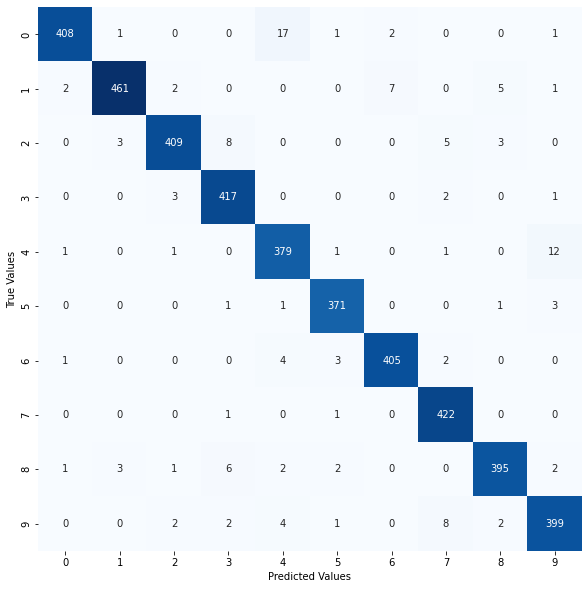

In [43]:
# Prediction on test data using trained model
y_pred=model_2.predict(xtest)
y_predicted = np.argmax(y_pred, 1)

#Plotting Confusion Matrix & Accuracy
print("Total number of data points :", len(y_predicted))
print("Accuracy on Test Data using CNN Model",accuracy_score(y_test, y_predicted)) # Accuracy

fig = plt.figure(figsize=(10, 10))
mat = confusion_matrix(y_test, y_predicted) # Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

Number of Missclassified points : 134


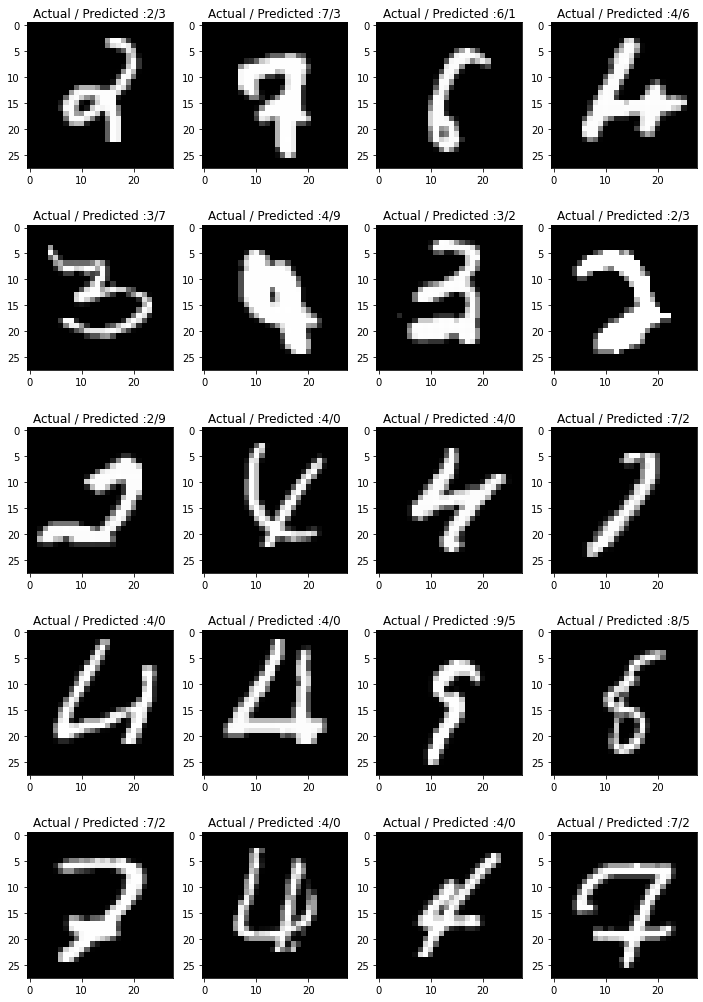

In [44]:
actual, predicted, location = False_Predicted(xtest, y_test, y_predicted)

print("Number of Missclassified points :", len(location))
image = xtest.reshape(xtest.shape[0], 28, 28)
plt.figure(figsize=(12,18))
for i in range(0,20):
  act=actual[i]
  pred=predicted[i]
  loc=location[i]
  plt.subplot(5, 4, (i+1))
  plt.imshow(image[loc], cmap="gray")
  plt.title('Actual / Predicted :'+str(act)+'/'+str(pred))

**Observation :**
1. Here the we are using a bit more complex model than before, using this model we have reduced the numbers of missclassified points.
2. The errors are maximum for the number 4, it is the most missclassified point as it miss interpreted by the model as 0 or 9.

**BEST MODEL**

Total number of data points : 4200
Accuracy on Test Data using CNN Model 0.9921428571428571


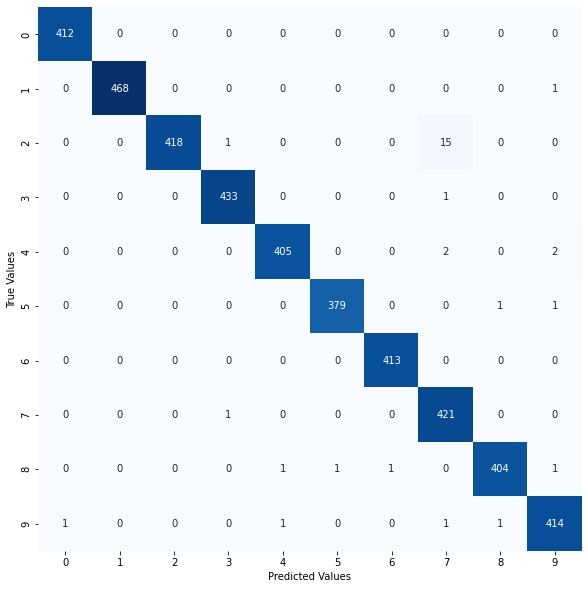

In [45]:
# Prediction on test data using trained model
y_pred=model.predict(xtest)
y_predicted = np.argmax(y_pred, 1)

#Plotting Confusion Matrix & Accuracy
print("Total number of data points :", len(y_predicted))
print("Accuracy on Test Data using CNN Model",accuracy_score(y_test, y_predicted)) # Accuracy

fig = plt.figure(figsize=(10, 10))
mat = confusion_matrix(y_test, y_predicted) # Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

Number of Missclassified points : 33


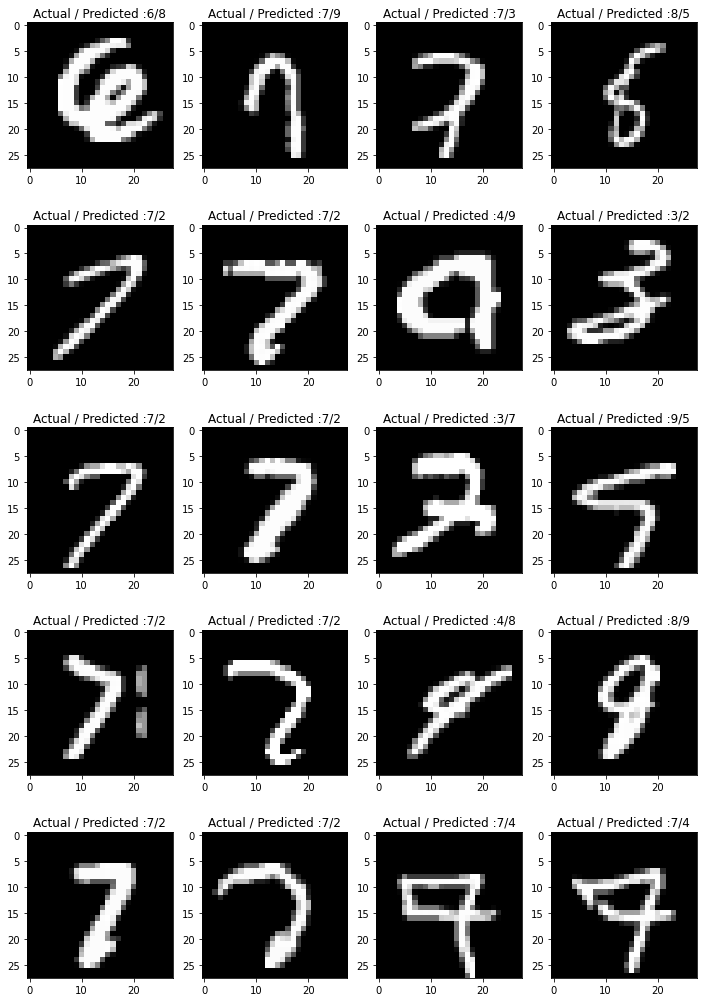

In [46]:
actual, predicted, location = False_Predicted(xtest, y_test, y_predicted)

print("Number of Missclassified points :", len(location))
image = xtest.reshape(xtest.shape[0], 28, 28)
plt.figure(figsize=(12,18))
for i in range(0,20):
  act=actual[i]
  pred=predicted[i]
  loc=location[i]
  plt.subplot(5, 4, (i+1))
  plt.imshow(image[loc], cmap="gray")
  plt.title('Actual / Predicted :'+str(act)+'/'+str(pred))

**Observation :**
1. This is by far the best Model that we have built.
2. Errors here are the ones that was seen before, for example the confusion of model between digit 7 & 4.
3. The number of missclassified points here are 33 which is the least out of all models.

### **Conclusion :**
In conclusion we can say that there are some digits where the confusion of the model is most likely to happen, so even after building a complex model this confusion was not resolved, digits for eg.7 & 4, 7 & 2, 7 & 9.
This error can reduced by focusing more on the digit 7, a more clear data of digit 7 will increase the accuracy of model.  
Also there is a need to clean data to increase accuracy as there are few digits which cannot be even properly identified by humans because of the writting style.  
Upon removing such images the accuracy will increase even more.